In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

from core.config import FILEDIR


In [2]:
def get_label(filename: str) -> str:
    """Get label from filename."""
    label, _ = filename.rsplit('.')

    return label


def get_color(label: str) -> str | None:
    """Get color from label."""
    if label not in colors.get_named_colors_mapping():
        return None

    if label == 'white':
        return 'black'
    return label


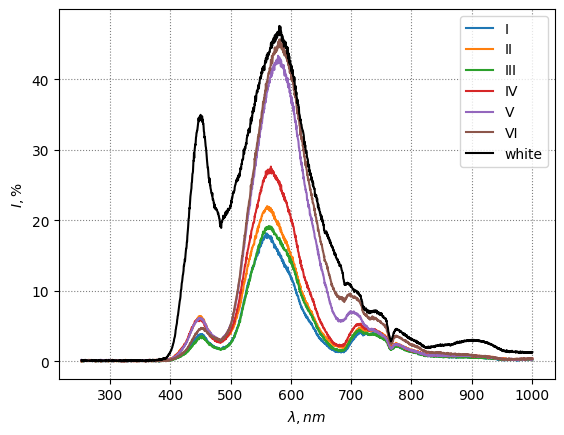

In [3]:
for dirpath, dirnames, filenames in os.walk(os.path.join('.', 'data', FILEDIR)):
    for filename in filenames:
        data = pd.read_csv(
            os.path.join(dirpath, filename),
            delimiter=',',
        )

        label = get_label(filename)
        plt.plot(
            data['wavelength'], data['intensity'],
            color=get_color(label),
            label=label,
        )


plt.xlabel('$\lambda, nm$')
plt.ylabel('$I, \%$')
plt.grid(
    color='grey', linestyle=':',
)
plt.legend()

# save
filedir = os.path.join('.', 'img', FILEDIR)
if not os.path.isdir(filedir):
    os.mkdir(filedir)

filepath = os.path.join(filedir, 'pic.png')
plt.savefig(
    filepath,
)

# show
plt.show()

In [4]:
green = pd.read_csv(
    os.path.join('.', 'data', FILEDIR, 'file (green).csv'),
    delimiter=',',
)
yellow = pd.read_csv(
    os.path.join('.', 'data', FILEDIR, 'file (yellow).csv'),
    delimiter=',',
)

ratio = pd.DataFrame(dict(
    wavelength=yellow.wavelength,
    intensity=yellow.intensity / green.intensity,
))


#
plt.plot(
    ratio['wavelength'], ratio['intensity'],
    color='black',
    label='ratio',
)

plt.axhline(
    1,
    color='red', linestyle='-', linewidth=1,
    alpha=1,
)
plt.axhline(
    0,
    color='red', linestyle='-', linewidth=1,
    alpha=.0,
)

plt.xlabel(r'$\lambda, nm$')
plt.ylabel(r'$\rho$')
plt.grid(
    color='grey', linestyle=':'
)
plt.legend()

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '.\\data\\2023.10.04 - leaves II\\file (green).csv'